# Major League Soccer Total Compensation Analysis

## Author: Brendan Zimmer

#### Sources:
#### https://data.world/dataremixed/mls-player-salaries-2010-2018/workspace/file?filename=MLS_Salaries.csv
#### https://www.kaggle.com/josephvm/major-league-soccer-dataset?select=all_players.csv

# Data Read/Clean

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
import collections

In [4]:
years = [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2019, 2020]

In [5]:
player_stats = pd.read_csv("all_players_stats.csv")
player_stats = player_stats.drop(["Club","A/90min", "YC", "RC", "PKG/A", "HmG", "RdG", "G/90min","SC%", "GWA", "HmA", "RdA", "FS", "OFF", "YC", "SOG%", "POS"], axis = 1)
player_stats

,Player,GP,GS,MINS,G,A,SHTS,SOG,GWG,FC,Year,Season
0,Roy Lassiter,30,30,2580,27,4,76,49,4,20,1996,reg
1,Raul Diaz Arce,28,28,2351,23,2,100,49,4,32,1996,reg
2,Eduardo Hurtado,26,26,2323,21,7,87,56,6,48,1996,reg
3,Preki,32,32,2880,18,13,140,61,3,26,1996,reg
4,Brian McBride,28,28,2307,17,3,79,44,3,21,1996,reg
...,...,...,...,...,...,...,...,...,...,...,...,...
15762,Alejandro Pozuelo,1,1,120,0,0,5,0,0,2,2020,post
15763,Franco Jara,2,2,210,0,0,5,1,0,6,2020,post
15764,Andy Polo,1,1,105,0,0,6,3,0,0,2020,post
15765,Cristian Roldan,4,4,360,0,0,6,1,0,5,2020,post


In [6]:
season = player_stats[(player_stats["Season"] == "post")].index
player_stats.drop(season, inplace = True)
player_stats = player_stats.drop(["Season"], axis = 1)
player_stats

,Player,GP,GS,MINS,G,A,SHTS,SOG,GWG,FC,Year
0,Roy Lassiter,30,30,2580,27,4,76,49,4,20,1996
1,Raul Diaz Arce,28,28,2351,23,2,100,49,4,32,1996
2,Eduardo Hurtado,26,26,2323,21,7,87,56,6,48,1996
3,Preki,32,32,2880,18,13,140,61,3,26,1996
4,Brian McBride,28,28,2307,17,3,79,44,3,21,1996
...,...,...,...,...,...,...,...,...,...,...,...
15296,Sebastian Mendez,19,11,1087,0,0,17,3,0,32,2020
15297,Kelyn Rowe,16,10,896,0,0,17,4,0,13,2020
15298,Siem de Jong,15,8,793,0,0,18,5,0,7,2020
15299,Maxime Chanot,20,20,1712,0,0,19,4,0,18,2020


In [7]:
for i in years:
    index_names = player_stats[ (player_stats['Year'] == i)].index
    player_stats.drop(index_names, inplace = True)




In [8]:
player_stats = player_stats.sort_values(['Year'], ascending = False)
player_stats

,Player,GP,GS,MINS,G,A,SHTS,SOG,GWG,FC,Year
8957,Alexi Gomez,18,16,1322,0,0,22,7,0,20,2018
8541,Michael Amir Murillo,23,21,1935,1,4,19,5,0,36,2018
8548,Jonathan Lewis,14,0,219,1,3,10,2,0,4,2018
8547,Dave Romney,28,26,2354,1,3,8,3,0,13,2018
8546,Justin Morrow,21,20,1790,1,3,8,5,0,13,2018
...,...,...,...,...,...,...,...,...,...,...,...
3277,Hugh MacDonald,0,0,0,0,0,0,0,0,0,2007
3278,Carlos Mendes,23,19,1709,0,0,0,0,0,12,2007
3279,Blake Camp,0,0,0,0,0,0,0,0,0,2007
3280,Gary Flood,5,2,197,0,0,0,0,0,1,2007


In [9]:
salaries = pd.read_csv("MLS_Salaries.csv")
salaries = salaries.drop(["Club (grouped)"], axis = 1)
salaries["Player"] = salaries["First Name"] + " " + salaries["Last Name"]
salaries["Year"] = salaries["Season"]
salaries = salaries.drop(["First Name", "Last Name", "Base Salary", "Club", "Season"], axis = 1)
salaries

,Position,Total Compensation,Player,Year
0,F,"$7,115,556",Sebastian Giovinco,2018
1,M,"$6,500,000",Michael Bradley,2018
2,F,"$6,292,500",Carlos Vela,2018
3,M,"$6,100,000",Bastian Schweinsteiger,2018
4,F,"$6,000,000",Giovani dos Santos,2018
...,...,...,...,...
6214,D,"$12,900",Nana Attakora-Gyan,2007
6215,M,"$12,900",Gabriel Gala,2007
6216,M,"$12,900",David Guzman,2007
6217,D,"$12,900",Stephen Lumley,2007


In [10]:
players = player_stats.merge(salaries, on = ["Player", "Year"])
players.dropna(subset = ["Position"], inplace = True)
players

,Player,GP,GS,MINS,G,A,SHTS,SOG,GWG,FC,Year,Position,Total Compensation
0,Alexi Gomez,18,16,1322,0,0,22,7,0,20,2018,M,"$339,450"
1,Jonathan Lewis,14,0,219,1,3,10,2,0,4,2018,F,"$125,500"
2,Dave Romney,28,26,2354,1,3,8,3,0,13,2018,D,"$74,419"
3,Justin Morrow,21,20,1790,1,3,8,5,0,13,2018,D,"$300,000"
4,Rolf Feltscher,15,15,1295,1,3,7,2,0,24,2018,D,"$270,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,Randi Patterson,0,0,0,0,0,0,0,0,0,2007,F,"$12,900"
4807,Carlos Mendes,23,19,1709,0,0,0,0,0,12,2007,D,"$62,606"
4808,Blake Camp,0,0,0,0,0,0,0,0,0,2007,M,"$12,900"
4809,Gary Flood,5,2,197,0,0,0,0,0,1,2007,D,"$12,900"


## Complete data set

In [11]:
players[players.columns[12:]] = players[players.columns[12:]].replace('[\$,]', '', regex=True).astype(int)
players

,Player,GP,GS,MINS,G,A,SHTS,SOG,GWG,FC,Year,Position,Total Compensation
0,Alexi Gomez,18,16,1322,0,0,22,7,0,20,2018,M,339450
1,Jonathan Lewis,14,0,219,1,3,10,2,0,4,2018,F,125500
2,Dave Romney,28,26,2354,1,3,8,3,0,13,2018,D,74419
3,Justin Morrow,21,20,1790,1,3,8,5,0,13,2018,D,300000
4,Rolf Feltscher,15,15,1295,1,3,7,2,0,24,2018,D,270000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,Randi Patterson,0,0,0,0,0,0,0,0,0,2007,F,12900
4807,Carlos Mendes,23,19,1709,0,0,0,0,0,12,2007,D,62606
4808,Blake Camp,0,0,0,0,0,0,0,0,0,2007,M,12900
4809,Gary Flood,5,2,197,0,0,0,0,0,1,2007,D,12900


# Figure 1

In [12]:
#Total wages of players by year 
players_dict = {}
for i in range(len(players)):
    if players["Year"].iloc[i] not in players_dict:
        players_dict[players["Year"].iloc[i]] = players["Total Compensation"].iloc[i]
    else:
        players_dict[players["Year"].iloc[i]] += players["Total Compensation"].iloc[i]

players_dict

{2018: 210034971,
 2017: 170307895,
 2016: 145342737,
 2015: 136427820,
 2014: 105407536,
 2013: 79223202,
 2012: 80135811,
 2011: 66344750,
 2010: 52482451,
 2009: 43651330,
 2008: 41664247,
 2007: 36268089}

In [13]:
player_c = players.copy()
player_count = players["Year"].value_counts()
player_count_dict = player_count.to_dict()

In [14]:
#number of players per year that are in the league
sorted_player_count = {}
od = collections.OrderedDict(sorted(player_count_dict.items(), reverse = True))
for i in od:
    sorted_player_count[i] = od[i]
    
sorted_player_count

{2018: 516,
 2017: 508,
 2016: 448,
 2015: 445,
 2014: 436,
 2013: 439,
 2012: 402,
 2011: 394,
 2010: 299,
 2009: 299,
 2008: 330,
 2007: 294}

In [15]:
#Increae of players of the year
increase = sorted_player_count[2018] - sorted_player_count[2007]
(increase/ sorted_player_count[2007])*100

75.51020408163265

In [16]:
increase = sorted_player_count[2011] - sorted_player_count[2010]
(increase/ sorted_player_count[2010])*100

31.77257525083612

In [17]:
#Average salary of player by year
player_average = {}
for i in od:
    players_dict[i] = (players_dict[i]/od[i])

players_dict

{2018: 407044.51744186046,
 2017: 335251.76181102364,
 2016: 324425.75223214284,
 2015: 306579.37078651687,
 2014: 241760.40366972476,
 2013: 180462.87471526195,
 2012: 199342.81343283583,
 2011: 168387.69035532995,
 2010: 175526.59197324415,
 2009: 145991.07023411372,
 2008: 126255.29393939395,
 2007: 123360.8469387755}

In [18]:
increase = players_dict[2018] - players_dict[2007]
(increase/ players_dict[2007])*100

229.9624861070209

In [19]:
increase = players_dict[2015] - players_dict[2014]
(increase/ players_dict[2014])*100

26.81124209460826

In [20]:
increase = players_dict[2018] - players_dict[2017]
(increase/ players_dict[2017])*100

21.414579670816263

In [21]:
# values = list(players_dict.values())
# names = list(players_dict.keys())

# fig, ax = plt.subplots()

# count = list(sorted_player_count.values())
# count_names = list(sorted_player_count.keys())
# ax.plot(names, values, label = "Average Compensation/1000")
# ax.plot(count_names, count, label = "Player Count")
# ax.legend(loc = "upper left")
# plt.title("Figure 1: Average Compensation with Player Count")
# plt.xlabel("Year")
# plt.ylabel("Count")
# plt.show()

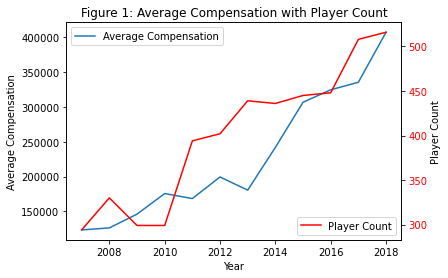

In [24]:
values = list(players_dict.values())
names = list(players_dict.keys())
count = list(sorted_player_count.values())
count_names = list(sorted_player_count.keys())
fig, ax = plt.subplots()
ax.plot(names, values, label = "Average Compensation")
ax.tick_params(axis='y')
ax.legend(loc = "upper left")
plt.xlabel("Year")
plt.ylabel("Average Compensation")
ax2 = ax.twinx()
ax2.plot(count_names, count, color = "red", label = "Player Count")
ax2.tick_params(axis = "y", labelcolor = "red")
ax2.legend(loc = "lower right")
plt.title("Figure 1: Average Compensation with Player Count")
plt.ylabel("Player Count")
plt.show()

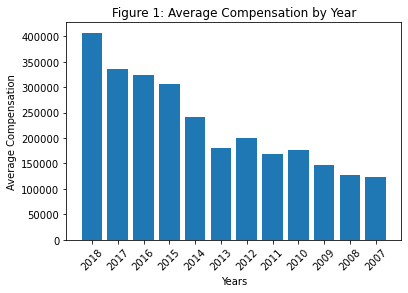

In [25]:
values = list(players_dict.values())
names = list(players_dict.keys())
count = list(player_count_dict.values())
plt.bar(range(len(players_dict)), values, tick_label = names)
plt.xlabel("Years")
plt.ylabel("Average Compensation")
plt.title("Figure 1: Average Compensation by Year")
plt.xticks(rotation = 45)
plt.show()

<BarContainer object of 12 artists>

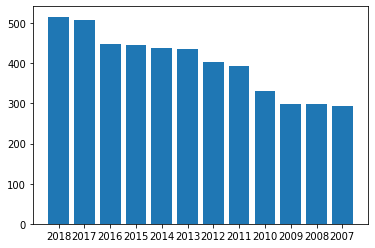

In [23]:
plt.bar(range(len(player_count_dict)), count, tick_label = names)

<AxesSubplot:>

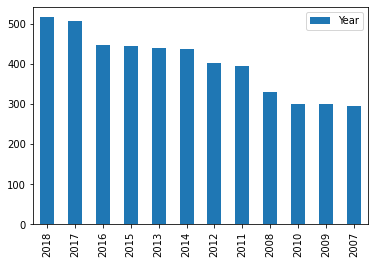

In [24]:
player_count_plot = pd.DataFrame(player_count)
player_count_plot.plot.bar()

# Figure 2

In [26]:
#create data set copy so main copy is not changed
player_b = players.copy()

In [27]:
player_b

,Player,GP,GS,MINS,G,A,SHTS,SOG,GWG,FC,Year,Position,Total Compensation
0,Alexi Gomez,18,16,1322,0,0,22,7,0,20,2018,M,339450
1,Jonathan Lewis,14,0,219,1,3,10,2,0,4,2018,F,125500
2,Dave Romney,28,26,2354,1,3,8,3,0,13,2018,D,74419
3,Justin Morrow,21,20,1790,1,3,8,5,0,13,2018,D,300000
4,Rolf Feltscher,15,15,1295,1,3,7,2,0,24,2018,D,270000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,Randi Patterson,0,0,0,0,0,0,0,0,0,2007,F,12900
4807,Carlos Mendes,23,19,1709,0,0,0,0,0,12,2007,D,62606
4808,Blake Camp,0,0,0,0,0,0,0,0,0,2007,M,12900
4809,Gary Flood,5,2,197,0,0,0,0,0,1,2007,D,12900


In [28]:
player_b = player_b.drop(["Position", "Year", "GS", "SHTS", "Total Compensation", "A", "Player"], axis = 1)

In [29]:
player_b

,GP,MINS,G,SOG,GWG,FC
0,18,1322,0,7,0,20
1,14,219,1,2,0,4
2,28,2354,1,3,0,13
3,21,1790,1,5,0,13
4,15,1295,1,2,0,24
...,...,...,...,...,...,...
4806,0,0,0,0,0,0
4807,23,1709,0,0,0,12
4808,0,0,0,0,0,0
4809,5,197,0,0,0,1


In [30]:
#player KMeans fit for the current data set
kma = KMeans(n_clusters = 8)
kma.fit(player_b)

KMeans()

In [31]:
c = kma.predict(player_b)
c

array([2, 3, 0, ..., 3, 3, 0])

player_b["clusters"] = c
player_b

kma.inertia_

In [32]:
inertia = []
ks = range(1, 6)
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(player_b)
    inertia.append(model.inertia_)
    
inertia

[4057868127.4108124,
 901743420.8568007,
 392561172.9279523,
 218605952.65381533,
 140721050.73280874]

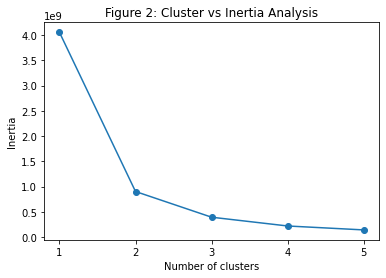

In [33]:
plt.plot(ks, inertia, '-o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Figure 2: Cluster vs Inertia Analysis")
plt.xticks(ks)
plt.show()

# Figure 3

In [35]:
#making new players copy for figure 3
player_3 = players.copy()

In [36]:
player_3["Position"] = player_3["Position"].replace(["M/F"], "M")

In [37]:
#sorting by player position
position_dict = {}
for i in range(len(player_3)):
    if player_3["Position"].iloc[i] not in position_dict:
        position_dict[player_3["Position"].iloc[i]] = 1
    else:
        position_dict[player_3["Position"].iloc[i]] += 1

position_dict

{'M': 1788,
 'F': 1137,
 'D': 1534,
 'D-M': 98,
 'F/M': 6,
 'M-F': 116,
 'F-M': 52,
 'GK': 1,
 'M-D': 59,
 'D/F': 4,
 'D/M': 6,
 'M/D': 6,
 'MF': 1,
 'D-F': 1,
 'F-D': 1}

In [38]:
#hardcode out the repeated positions to reduce amount of positions
for i in position_dict:
    if i == "GK":
        pass
    if i == "M":
        pass
    if i == "F":
        pass
    if i == "D":
        pass
    else:
        player_3["Position"] = player_3["Position"].replace([i], i[0])

In [39]:
#create new dictionary to show reduced number of positions
position_dict_update = {}
for i in range(len(player_3)):
    if player_3["Position"].iloc[i] not in position_dict_update:
        position_dict_update[player_3["Position"].iloc[i]] = 1
    else:
        position_dict_update[player_3["Position"].iloc[i]] += 1
        
position_dict_update

{'M': 1970, 'F': 1196, 'D': 1643, 'G': 1}

In [57]:
#new data set with updated positions
player_3.head()

,Player,GP,GS,MINS,G,A,SHTS,SOG,GWG,FC,Year,Position,Total Compensation
0,Alexi Gomez,18,16,1322,0,0,22,7,0,20,2018,M,339450
1,Jonathan Lewis,14,0,219,1,3,10,2,0,4,2018,F,125500
2,Dave Romney,28,26,2354,1,3,8,3,0,13,2018,D,74419
3,Justin Morrow,21,20,1790,1,3,8,5,0,13,2018,D,300000
4,Rolf Feltscher,15,15,1295,1,3,7,2,0,24,2018,D,270000


In [41]:
#creation of train and test split
train, test = train_test_split(player_3, test_size = .30, random_state = 0)

In [44]:
#pipline with a linear regression and polynomial freatures of 2 with importance of position emphasized
pipe = Pipeline([
    ("Predicted", make_column_transformer(
                                          (PolynomialFeatures(degree = 2, include_bias = False), ["GP", "GS", "G", "A", "SOG", "FC", "Year"]),
                                          remainder = "passthrough")),
    ("lr", LinearRegression())
    
])

In [45]:
#fitting the train data to the pipeline based on position
pipe.fit(train[["GP", "GS", "G", "A", "SOG", "FC", "Year"]], train["Total Compensation"])

Pipeline(steps=[('Predicted',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('polynomialfeatures',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['GP', 'GS', 'G', 'A', 'SOG',
                                                   'FC', 'Year'])])),
                ('lr', LinearRegression())])

In [46]:
#testing pipeline to make sure returns correctly
predicted = pipe.predict(test[["GP", "GS", "G", "A", "SOG", "FC", "Year"]])
test["predicted"] = predicted
test

,Player,GP,GS,MINS,G,A,SHTS,SOG,GWG,FC,Year,Position,Total Compensation,predicted
825,Kharlton Belmar,1,0,6,0,0,0,0,0,0,2017,F,65004,109450.838718
1705,Sebastian Jaime,20,17,1267,5,2,20,8,0,28,2015,F,266667,580023.025103
4135,Tiyiselani Shipalane,0,0,0,0,0,0,0,0,0,2009,M,16300,54350.792867
3538,Robbie Russell,26,22,1809,0,2,8,1,0,17,2011,D,134001,187574.155512
3557,Nicholas Lindsay,0,0,0,0,0,0,0,0,0,2011,F,43000,83965.298681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,Kevan George,4,2,204,0,0,2,0,0,3,2014,M,48825,35314.136322
1300,Coy Craft,2,0,17,0,0,0,0,0,0,2016,F,87083,58915.459868
2384,Alam Syamsir,0,0,0,0,0,0,0,0,0,2013,M,46500,110990.998843
242,Ezequiel Barco,26,19,1730,4,3,21,10,1,8,2018,M,1425000,329186.896422


In [47]:
#players predicted salary based on year due to their position using the test pipeline
players_predict_salary = {}
player_count_test_dict = {}
for i in range(len(test)):
    if test["Year"].iloc[i] not in players_predict_salary:
        players_predict_salary[test["Year"].iloc[i]] = test["predicted"].iloc[i]
    else:
        players_predict_salary[test["Year"].iloc[i]] += test["predicted"].iloc[i]


player_count_test = test["Year"].value_counts()
player_count_test_dict = player_count_test.to_dict()
player_count_test_dict

for i in player_count_test.iteritems():
    players_predict_salary[i[0]] = (players_predict_salary[i[0]]/i[1])

dic_items = players_predict_salary.items()
sort_items = sorted(dic_items)
sort_items

[(2007, 49789.63159555051),
 (2008, 172352.71798563725),
 (2009, 126921.35153133125),
 (2010, 152389.77553215594),
 (2011, 161604.4905498306),
 (2012, 170523.9724854718),
 (2013, 208497.07921214038),
 (2014, 310234.53369628865),
 (2015, 306972.8058248921),
 (2016, 248118.17375225655),
 (2017, 360147.6718579508),
 (2018, 394531.55630807136)]

In [48]:
#pipeline score was sufficent
pipe.score(test[["GP", "GS", "G", "A", "SOG", "FC", "Year"]], test["Total Compensation"])

0.4203822920037945

In [50]:
coef[0]

3330999.0978109576

In [51]:
names = pipe["Predicted"].get_feature_names()

C:\Users\Brendan\Documents\Miniforge3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [52]:
index  = ["Games Played", "Goals Scored", "Goals", "Assists", "SOG", "Fouls", "Year"]
coef_series = pd.Series(coef[0:7]/1000, index)
coef_series

Games Played    3330.999098
Goals Scored   -3521.855360
Goals          -4892.718057
Assists         1787.596544
SOG            -5168.663335
Fouls           -335.454954
Year            1315.682093
dtype: float64

In [53]:
data = {"Features" : index,
       "Coefficient Weight" : coef[0:7]}

In [54]:
df = pd.DataFrame(data, columns = ["Features", "Coefficient Weight"])

In [55]:
#coefficient weight of the features selected that will determine the players salary
df

,Features,Coefficient Weight
0,Games Played,3.330999e+06
1,Goals Scored,-3.521855e+06
2,Goals,-4.892718e+06
3,Assists,1.787597e+06
4,SOG,-5.168663e+06
5,Fouls,-3.354550e+05
6,Year,1.315682e+06


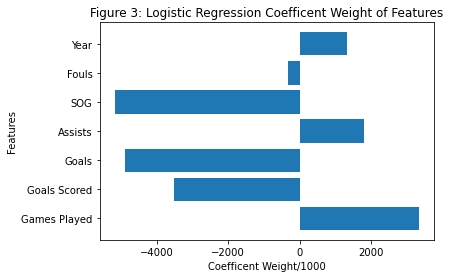

In [56]:
#plot showing the importance of each coefficent
plt.barh(index, coef[0:7]/1000)
plt.title("Figure 3: Logistic Regression Coefficent Weight of Features")
plt.ylabel("Features")
plt.xlabel("Coefficent Weight/1000")
plt.show()